In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pyarrow.parquet as pq



/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## get model and prediction

## 0.005 GeV

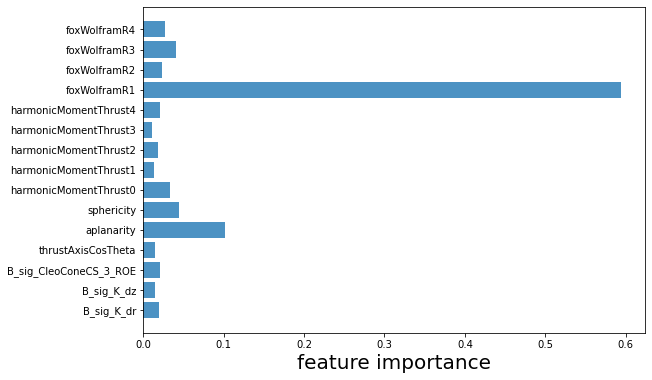

In [6]:
df = pq.read_table("/ceph/aavocone/Datasets/0_large.parquet")
df = df.to_pandas()
#test train split
X = df[df.columns[:-1]]    #exclude "signal" "classification" "B_sig_isSignalAcceptMissingNeutrino"
y = df["signal"]            
xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5, stratify= ytrain)

model50 = xgb.XGBClassifier()
model50.load_model(f"/ceph/aavocone/PFOM_models/over0_150.txt")

ranking50 = model50.feature_importances_

plt.figure(figsize=(9,6))
plt.barh(xtrain.columns,ranking50,alpha = 0.8)
plt.xlabel("feature importance",fontsize=20)
plt.savefig("/work/aavocone/week12/0_value_ranking.pdf", format="pdf",bbox_inches="tight")
plt.show()



## 3.0 GeV

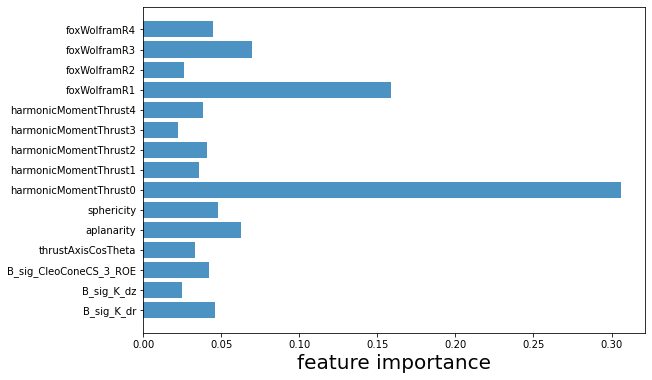

In [7]:

df = pq.read_table("/ceph/aavocone/Datasets/3_large.parquet")
df = df.to_pandas()
#test train split
X = df[df.columns[:-1]]    #exclude "signal" "classification" "B_sig_isSignalAcceptMissingNeutrino"
y = df["signal"]            
xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5, stratify= ytrain)

model50 = xgb.XGBClassifier()
model50.load_model(f"/ceph/aavocone/PFOM_models/3_0_500.txt")

ranking50 = model50.feature_importances_

plt.figure(figsize=(9,6))
plt.barh(xtrain.columns,ranking50,alpha = 0.8)
plt.xlabel("feature importance",fontsize=20)
plt.savefig("/work/aavocone/week12/3_value_ranking.pdf", format="pdf",bbox_inches="tight")
plt.show()





## 4.6 GeV

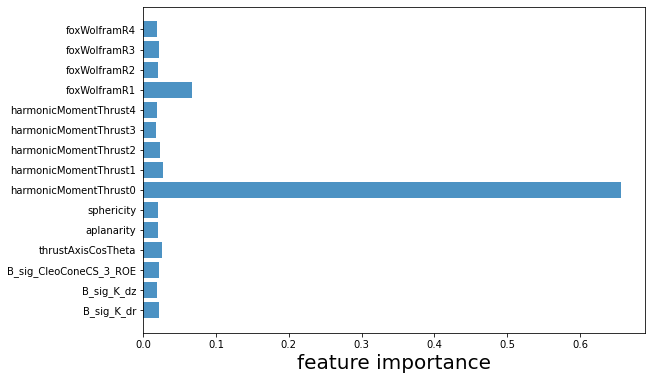

In [9]:

df = pq.read_table("/ceph/aavocone/Datasets/3_large.parquet")
df = df.to_pandas()
#test train split
X = df[df.columns[:-1]]    #exclude "signal" "classification" "B_sig_isSignalAcceptMissingNeutrino"
y = df["signal"]            
xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5, stratify= ytrain)

model50 = xgb.XGBClassifier()
model50.load_model(f"/ceph/aavocone/PFOM_models/new_4_6_model500.txt")

ranking50 = model50.feature_importances_

plt.figure(figsize=(9,6))
plt.barh(xtrain.columns,ranking50,alpha = 0.8)
plt.xlabel("feature importance",fontsize=20)

plt.savefig("/work/aavocone/week12/4_value_ranking.pdf", format="pdf",bbox_inches="tight")
plt.show()

## correlation


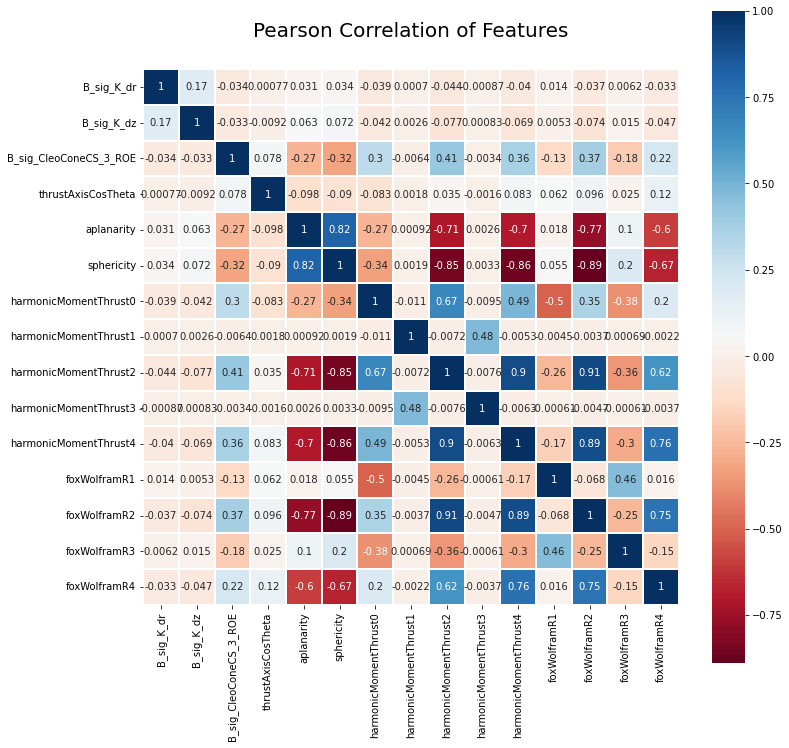

In [7]:
import seaborn as sns

colormap = plt.cm.RdBu
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.savefig(f"/work/aavocone/week9/pearson_corr.pdf", format="pdf",bbox_inches="tight")
plt.show()
